# Tutorial in Hydrology
## Gauges, Discharge and Water Balance

This is a tutorial in Hydrology.
(cc) jackisch@kit.edu

In [1]:
#load required packages
import numpy as np
import pandas as pd
import scipy.stats as st
import scipy.optimize as so
%pylab inline

#these can be used to get nicer graphics
#import seaborn as sns
#sns.set(style='whitegrid', palette='deep')
#matplotlib.rcParams['svg.fonttype'] = 'none'

Populating the interactive namespace from numpy and matplotlib


## Rating Curve

At gauges rarely flux is measured directly. In most cases, the water level is monitored. This exercise will derive rating curves for some gauge station based on discharge measurements and known water levels.

In [2]:
#read data
RC_attert = pd.read_csv('rating_curve_HQ.csv')

#print the observed gauges
RC_attert.Gauge.unique()

array(['Colpach', 'Huewelerbach', 'Useldange', 'Weierbach'], dtype=object)

We will now take the Colpach as an example for the derivation of a rating curve. At first, we plot the data to see what we have got.

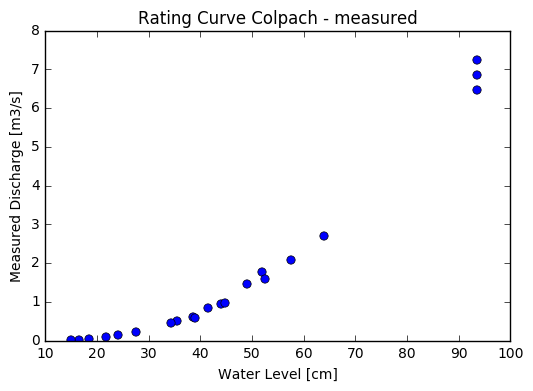

In [3]:
#Colpach example
RC_dummy = RC_attert.loc[RC_attert.Gauge=='Colpach']
plot(RC_dummy.Level,RC_dummy.Q_m3s,'o')
xlabel('Water Level [cm]')
ylabel('Measured Discharge [m3/s]')
title('Rating Curve Colpach - measured')

A rating curve is nothing else than a regression function of such observations. It can then be used to calculate flow from any recorded water level.

Obviously, this is some kind of exponential equation. Thus we will try to fit a rating curve of the following form:

$Q  = a*(H-c_{offset})^b$ 

For the gauges you receive the values for $c_{offset}$:
* Colpach 11.
* Weierbach 10.2
* Useldange 5.
* Huewelerbach 8.

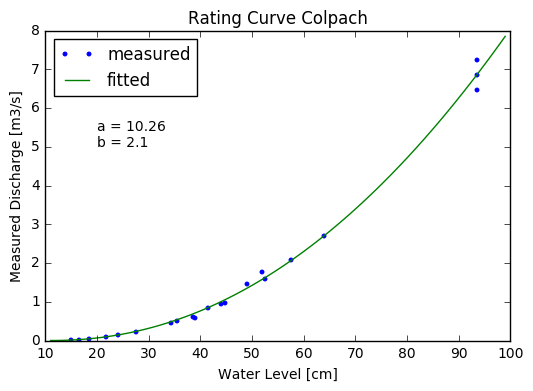

In [4]:
#We define the function as above
def RCf_fixc(H,a,b):
    #Calculate flux [m3/s] from a given water level [cm]
    #we convert H and c to meters
    #c is given
    c=11.
    return a*((H-c)/100.)**b

#def RCf(H,a,b,c):
    #Calculate flux [m3/s] from a given water level [cm]
    #we convert H and c to meters
    #c is not given
    #return a*((H-c)/100.)**b


#Fit the curve using 
opt, covar = so.curve_fit(RCf_fixc, RC_dummy.Level,RC_dummy.Q_m3s,maxfev = 100000)

plot(RC_dummy.Level,RC_dummy.Q_m3s,'.',label='measured')
dummy_range = np.arange(100)
plot(dummy_range,RCf_fixc(dummy_range,opt[0],opt[1]),'-',label='fitted')
text(20,5,''.join(['a = ',str(np.round(opt[0],2)),'\nb = ',str(np.round(opt[1],2))]))
legend(loc=2)
xlabel('Water Level [cm]')
ylabel('Measured Discharge [m3/s]')
title('Rating Curve Colpach')


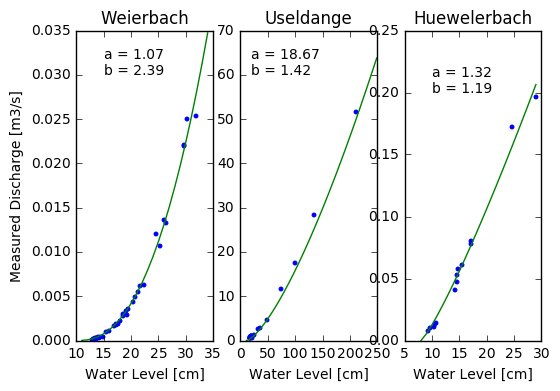

In [5]:
#Let's do that for all gauges:

def RCf_fixw(H,a,b):
    c=10.2
    return a*((H-c)/100.)**b

def RCf_fixu(H,a,b):
    c=5.
    return a*((H-c)/100.)**b

def RCf_fixh(H,a,b):
    c=8.
    return a*((H-c)/100.)**b



#Fit the curves
RC_dummy=RC_attert.loc[RC_attert.Gauge=='Weierbach']
opt_w, covar_w = so.curve_fit(RCf_fixw, RC_dummy.Level,RC_dummy.Q_m3s,maxfev = 100000)

subplot(131)
plot(RC_dummy.Level,RC_dummy.Q_m3s,'.',label='measured')
dummy_range = np.arange(35)
plot(dummy_range,RCf_fixw(dummy_range,opt_w[0],opt_w[1]),'-',label='fitted')
text(15,0.03,''.join(['a = ',str(np.round(opt_w[0],2)),'\nb = ',str(np.round(opt_w[1],2))]))
#legend(loc=2)
xlabel('Water Level [cm]')
ylabel('Measured Discharge [m3/s]')
title('Weierbach')


RC_dummy=RC_attert.loc[RC_attert.Gauge=='Useldange']
opt_u, covar_u = so.curve_fit(RCf_fixu, RC_dummy.Level,RC_dummy.Q_m3s,maxfev = 100000)

subplot(132)
plot(RC_dummy.Level,RC_dummy.Q_m3s,'.',label='measured')
dummy_range = np.arange(250)
plot(dummy_range,RCf_fixc(dummy_range,opt_u[0],opt_u[1]),'-',label='fitted')
text(20,60,''.join(['a = ',str(np.round(opt_u[0],2)),'\nb = ',str(np.round(opt_u[1],2))]))
#legend(loc=2)
xlabel('Water Level [cm]')
#ylabel('Measured Discharge [m3/s]')
title('Useldange')


RC_dummy=RC_attert.loc[RC_attert.Gauge=='Huewelerbach']
opt_h, covar_h = so.curve_fit(RCf_fixh, RC_dummy.Level,RC_dummy.Q_m3s,maxfev = 100000)

subplot(133)
plot(RC_dummy.Level,RC_dummy.Q_m3s,'.',label='measured')
dummy_range = np.arange(30)
plot(dummy_range,RCf_fixh(dummy_range,opt_h[0],opt_h[1]),'-',label='fitted')
text(10,0.2,''.join(['a = ',str(np.round(opt_h[0],2)),'\nb = ',str(np.round(opt_h[1],2))]))
#legend(loc=2)
xlabel('Water Level [cm]')
#ylabel('Measured Discharge [m3/s]')
title('Huewelerbach')





In [6]:
#now we can define our rating curve function for the gauge "Colpach"
def RCf_colpach(H):
    #Calculate flux [m3/s] from a given water level [cm] at gauge Colpach
    c=11.
    a=opt[0]
    b=opt[1]
    return a*((H-c)/100.)**b

def RCf_weierbach(H):
    c=10.2
    a=opt_w[0]
    b=opt_w[1]
    return a*((H-c)/100.)**b

def RCf_useldange(H):
    c=5.
    a=opt_u[0]
    b=opt_u[1]
    return a*((H-c)/100.)**b

def RCf_huewelerbach(H):
    c=8.
    a=opt_h[0]
    b=opt_h[1]
    return a*((H-c)/100.)**b



Now we have the tools to apply the rating curves to the measured gauges.

We will read a file with some observation time series and apply our functions:

In [7]:
#read file:
GA = pd.read_csv('Gauges_Attert.csv')
#define time stamp as index
GA.index=pd.to_datetime(GA.iloc[:,0].values)
#drop old time stamp column
GA=GA.drop('Unnamed: 0',axis=1)

print('These are measured water levels in cm:')
GA.head()

These are measured water levels in cm:


,Colpach,Weierbach,Useldange,Huewelerbach
2010-11-01 00:00:00,18.439396,14.223472,19.314814,10.187419
2010-11-01 00:15:00,18.519499,13.864206,19.314814,10.187419
2010-11-01 00:30:00,18.519499,13.864206,19.314814,10.187419
2010-11-01 00:45:00,18.519499,13.864206,19.314814,10.187419
2010-11-01 01:00:00,18.439396,13.864206,19.314814,10.187419


In [8]:
#copy the data frame:
QA = GA.copy()

#apply rating curves:
QA.Colpach=RCf_colpach(QA.Colpach)
QA.Weierbach=RCf_weierbach(QA.Weierbach)
QA.Useldange=RCf_useldange(QA.Useldange)
QA.Huewelerbach=RCf_huewelerbach(QA.Huewelerbach)

In [9]:
print('These are measured flow rates in m3/s:')
QA.head()

These are measured flow rates in m3/s:


,Colpach,Weierbach,Useldange,Huewelerbach
2010-11-01 00:00:00,0.044,0.0005,1.189,0.014049
2010-11-01 00:15:00,0.045,0.0004,1.189,0.014049
2010-11-01 00:30:00,0.045,0.0004,1.189,0.014049
2010-11-01 00:45:00,0.045,0.0004,1.189,0.014049
2010-11-01 01:00:00,0.044,0.0004,1.189,0.014049


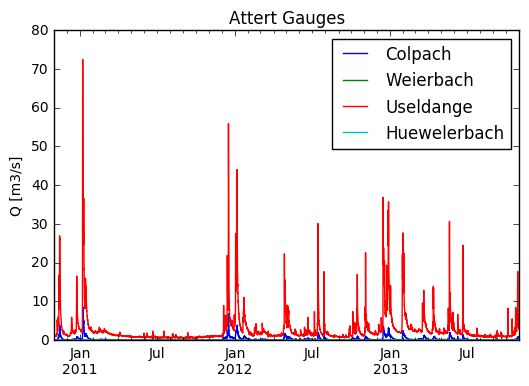

In [10]:
#plot the data
QA.plot()
title('Attert Gauges')
ylabel('Q [m3/s]')

## Water Balance
Now that we have the observed water levels converted into flow, we know the sink-term $(Q)$ of the water balance equation of a catchment:

$\Delta S = P - Q - ET$

Let's get a hand on the other parts by reading some meteorological observation data.

In [11]:
#read file:
meteo = pd.read_csv('Meteo.csv')
#define time stamp as index
meteo.index=pd.to_datetime(meteo.iloc[:,0].values)
#drop old time stamp column
meteo=meteo.drop('Tag_Stunde',axis=1)

meteo.columns

Index(['SUM_SSDU', 'SUM_GS200U', 'AVG_WV1000U', 'AVG_TB050U', 'AVG_RH200U',
       'MAX_TA005maxU', 'SUM_NN050U', 'MIN_TA005minU', 'MAX_TA200maxU',
       'AVG_TB005U', 'MAX_WV1000maxU', 'MIN_TA200minU', 'AVG_TA005U',
       'AVG_TA200U', 'AVG_TB100U', 'AVG_TB030U', 'MAX_TA200maxR', 'AVG_TB050R',
       'AVG_TB005R', 'AVG_RH200R', 'MAX_TA005maxR', 'MIN_TA200minR',
       'AVG_TA005R', 'AVG_TB100R', 'AVG_TA200R', 'AVG_TB030R', 'SUM_NN050R',
       'MIN_TA005minR'],
      dtype='object')

### information about the data:
The data comprises two stations in the basin: Useldange and Roodt. They are marked with U and R at the end of the column names, respectively.

The following data is included:
 * WV1000: Wind in 10m [m/s]
 * RH200: Relative Humidity [%]
 * GS200: Global Radiation [Wh/m2]
 * TA005: Air Temperature in 5 cm [°C]
 * TA200: Air Temperature in 2 m [°C]
 * TB005: Temperature Soil in 5 cm [°C]
 * TB030: Temperature Soil in 30 cm [°C]
 * TB050: Temperature Soil in 50 cm [°C]
 * TB100: Temperature Soil in 1 m [°C]
 * SSD: Sunshine duration [h]
 * NN050: Precipitation [mm]


In [12]:
SpeQA=QA.copy()

#to avoid averaging errors we will convert the fluxes of the inferred flow into volumes:
#flow to volume of a 15min average [m3/s]*(15.*60.)[s] --> [m3]
SpeQA*=(15.*60.)
SpeQA.head(5)

,Colpach,Weierbach,Useldange,Huewelerbach
2010-11-01 00:00:00,39.6,0.45,1070.1,12.644121
2010-11-01 00:15:00,40.5,0.36,1070.1,12.644121
2010-11-01 00:30:00,40.5,0.36,1070.1,12.644121
2010-11-01 00:45:00,40.5,0.36,1070.1,12.644121
2010-11-01 01:00:00,39.6,0.36,1070.1,12.644121


In [13]:
#add precipitation to data frame
#notice: the gauge data are in 15 min time steps; the meteo obs are 1h sums/averages
#hence we have to resample the data to the larger time step

#copy discharge data frame
SpeQA=QA.copy()

#to avoid averaging errors we will convert the fluxes of the inferred flow into volumes:
#flow to volume of a 15min average [m3/s]*(15.*60.)[s] --> [m3]
SpeQA*=(15.*60.)

#rainfall is given as height which needs to be muliplied by the catchment under study to get a volume.
#however, we do not have as many stations to get a distributed input. so we make life easy by converting 
#the volume which is exported by the catchment area to get the "Specific Discharge"
#[m3] / catchment area [m2] --> [m]

#get areas:
Area=pd.read_csv('catch_area.csv')

#apply conversion to specific discharge
SpeQA.Colpach/=Area.Colpach.values
SpeQA.Weierbach/=Area.Weierbach.values
SpeQA.Useldange/=Area.Useldange.values
SpeQA.Huewelerbach/=Area.Huewelerbach.values

#convert [m] --> [mm]
SpeQA*=1000.

#rainfall as hight of a 1h sum [mm] 
precip = meteo[['SUM_NN050U','SUM_NN050R']]
precip.columns = ['P_Useldange','P_Roodt']

#combine the data sets be resampling the discharge to 1 hour sums
WB_attert = pd.concat([SpeQA.resample('1H').sum(),precip],axis=1)

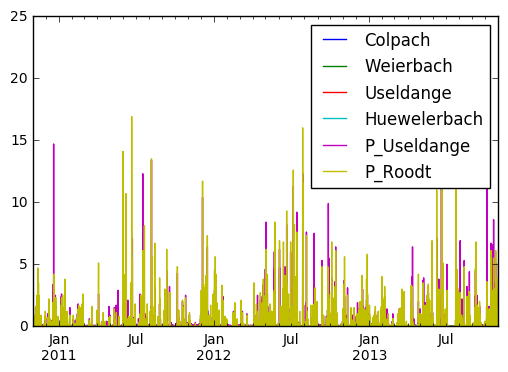

In [14]:
WB_attert.plot()

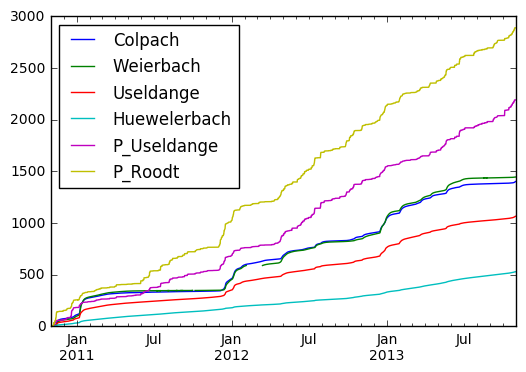

In [15]:
WB_attert.cumsum().plot()

### Annual water balance
Now that we have the data ready, let's calculate some water balances for the hydrological years between Novembre 2010 and Octobre 2013.

A hydrological year is defined as the period from beginning of autumn to end of summer the year after. For the region of the Attert this is Nov-01 to Oct-31.

If we assume $\Delta S = 0$ for one hydrological year, the balance equation $\Delta S = P - Q - ET$ can be used to estimate the basically unknown sink term for evapotranspiration (if we also assume that there is no further sink in the system like zero groundwater recharge):

$ET = P - Q$

In [98]:
starttime1=pd.to_datetime('2010-11-01 00:00:00')
endtime1=pd.to_datetime('2011-10-31 23:59:00')
starttime2=pd.to_datetime('2011-11-01 00:00:00')
endtime2=pd.to_datetime('2012-10-31 23:59:00')
starttime3=pd.to_datetime('2012-11-01 00:00:00')
endtime3=pd.to_datetime('2013-10-31 23:59:00')

WB_annual=pd.concat([WB_attert.loc[starttime1:endtime1].sum(axis=0),
                     WB_attert.loc[starttime2:endtime2].sum(axis=0),
                     WB_attert.loc[starttime3:endtime3].sum(axis=0)],axis=1)

WB_annual.columns=[['2011','2012','2013']]
print('water balance compartments [mm]:')
WB_annual

water balance compartments [mm]:


,2011,2012,2013
Colpach,339.082374,528.559857,535.032831
Weierbach,346.784433,498.019832,599.738219
Useldange,275.309189,362.596730,427.547034
Huewelerbach,150.032939,139.336900,238.594033
P_Useldange,530.700000,846.500000,812.800000
P_Roodt,757.000000,1140.300000,990.500000


In [99]:
#Let's assume the recorded precipitation at Useldange is valid for all basins.
#Hence ET would be:

WB_ET=-WB_annual.loc[['Colpach','Weierbach','Useldange','Huewelerbach']]+WB_annual.loc['P_Useldange'].values
print('ET estimated by water balance [mm]:')
WB_ET

ET estimated by water balance [mm]:


,2011,2012,2013
Colpach,191.617626,317.940143,277.767169
Weierbach,183.915567,348.480168,213.061781
Useldange,255.390811,483.903270,385.252966
Huewelerbach,380.667061,707.163100,574.205967


Are these realistic values? What would you expect the values to be in terms of spatial and temporal differences?

## Model ET
There are many models for calculating evapotranspiration out there. We will use three to refer our observations against. For sake of brevity we will not dive into the details of these models here but just apply them...

In [47]:
#use Daily Actual Evapotranspiration after Szilagyi, J. 2007, doi:10.1029/2006GL028708
import ET_SJ

#prepare meteo data:

#(Tmax,Tmin,RHmax,RHmin,Rs,u2,J,lat,Elev, alpha, z0):
SJ_meteo = pd.concat([meteo.AVG_TA200U.resample('d').max(),
                      meteo.AVG_TA200U.resample('d').min(),
                      meteo.AVG_RH200U.resample('d').max(),
                      meteo.AVG_RH200U.resample('d').min(),
                      meteo.SUM_GS200U.resample('d').sum()*0.0036,
                      meteo.AVG_WV1000U.resample('d').mean()*3.6,
                      pd.Series(meteo.SUM_GS200U.resample('d').sum().index.dayofyear, meteo.SUM_GS200U.resample('d').sum().index)],axis=1)
SJ_meteo.columns=(['Tmax','Tmin','RHmax','RHmin','Rs','u2','J'])


    

In [48]:
SJ_meteo.head()


,Tmax,Tmin,RHmax,RHmin,Rs,u2,J
2010-11-01,16.50,4.40,98.92,64.54,4.551660,3.2145,305
2010-11-02,12.57,3.90,98.47,72.63,3.572892,10.3515,306
2010-11-03,13.13,10.87,97.51,86.84,0.000000,18.2250,307
2010-11-04,16.22,12.98,95.89,79.91,0.693432,23.0160,308
2010-11-05,13.43,11.40,88.17,77.13,0.165204,21.1830,309


In [95]:
import scipy.signal as sps
ETsj = ET_SJ.ET_SJ(SJ_meteo.Tmax,SJ_meteo.Tmin,SJ_meteo.RHmax,SJ_meteo.RHmin,SJ_meteo.Rs,SJ_meteo.u2,SJ_meteo.J,lat=49.8,Elev=230.,alpha=0.23, z0=0.02)
ETsj[ETsj<0.]=np.nan
ETsj=ETsj.interpolate()
ETsj=pd.Series(sps.savgol_filter(ETsj,5, 2, mode='nearest'),SJ_meteo.index)

In [96]:
ETsj_annual=[ETsj.loc[starttime1:endtime1].sum(),
              ETsj.loc[starttime2:endtime2].sum(),
              ETsj.loc[starttime3:endtime3].sum()]
ETsj_annual=pd.DataFrame(ETsj_annual).T
ETsj_annual.index=['ET_sj']
ETsj_annual.columns=[['2011','2012','2013']]
ETsj_annual

,2011,2012,2013
ET_sj,209.501462,227.318992,306.014166


In [100]:
WB_annual = pd.concat([WB_annual,ETsj_annual],axis=0)
WB_annual

,2011,2012,2013
Colpach,339.082374,528.559857,535.032831
Weierbach,346.784433,498.019832,599.738219
Useldange,275.309189,362.596730,427.547034
Huewelerbach,150.032939,139.336900,238.594033
P_Useldange,530.700000,846.500000,812.800000
P_Roodt,757.000000,1140.300000,990.500000
ET_sj,209.501462,227.318992,306.014166


In [102]:
print('Waterbalance in different Catchments:')
-WB_annual.loc[['Colpach','Weierbach','Useldange','Huewelerbach']]+WB_annual.loc['P_Useldange'].values-WB_annual.loc['ET_sj'].values


Waterbalance in different Catchments:


,2011,2012,2013
Colpach,-17.883835,90.621150,-28.246997
Weierbach,-25.585894,121.161175,-92.952385
Useldange,45.889350,256.584277,79.238800
Huewelerbach,171.165600,479.844108,268.191800


We see that there is quite some discrepancy compared to our assumptions.
Please discuss the results.

In [78]:
#read file:
QA = pd.read_csv('QA_m3s.csv')
#define time stamp as index
QA.index=pd.to_datetime(QA.iloc[:,0].values)
#drop old time stamp column
QA=QA.drop('Unnamed: 0',axis=1)

print('These are measured water levels in cm:')
QA.head()

These are measured water levels in cm:


,Colpach,Weierbach,Huewelerbach,Useldange
2010-11-01 00:00:00,0.044,0.0005,0.014049,1.189
2010-11-01 00:15:00,0.045,0.0004,0.014049,1.189
2010-11-01 00:30:00,0.045,0.0004,0.014049,1.189
2010-11-01 00:45:00,0.045,0.0004,0.014049,1.189
2010-11-01 01:00:00,0.044,0.0004,0.014049,1.189


In [79]:
#Reverse Engineering...
def RCx_c(Q):
    #Calculate flux [m3/s] from a given water level [cm] at gauge Colpach
    c=11.
    a=opt[0]
    b=opt[1]
    return ((Q/a)**(1./b))*100.+c

def RCx_w(Q):
    c=10.2
    a=opt_w[0]
    b=opt_w[1]
    return ((Q/a)**(1./b))*100.+c

def RCx_u(Q):
    c=5.
    a=opt_u[0]
    b=opt_u[1]
    return ((Q/a)**(1./b))*100.+c

def RCx_h(Q):
    c=8.
    a=opt_h[0]
    b=opt_h[1]
    return ((Q/a)**(1./b))*100.+c




In [80]:
pd.concat([RCx_c(QA.Colpach),RCx_w(QA.Weierbach),RCx_u(QA.Useldange),RCx_h(QA.Huewelerbach)],axis=1).to_csv('Gauges_Attert.csv')